Please collapse the following heading to jump to task 3.

# **Task 1: Carbon intensity differences between sectors**

In [62]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

In [31]:
# import data
path = "PublicTablesForCarbonCatalogueDataDescriptor_v30Oct2021.xlsx"
df = pd.read_excel(path)

## Data inspection

In [ ]:
df.head()

In [ ]:
df.info()

## Inspect carbon intensity across sectors

In [30]:
# calculate mean carbon intensity across sectors
sector_average = df.groupby('*Company\'s sector')['*Carbon intensity'].mean()
print(sector_average)

*Company's sector
Automobiles & components                 21.599867
Chemicals                                 5.173017
Comm. equipm. & capital goods           106.041607
Computer, IT & telecom                   75.294625
Construction & commercial materials       1.178955
Food & Beverage                           5.087266
Home durables, textiles, & equipment     13.283033
Packaging for consumer goods              1.276053
Name: *Carbon intensity, dtype: float64


In [29]:
# calculate variance in carbon intensity across sectors
variance_by_sector = df.groupby('*Company\'s sector')['*Carbon intensity'].var()
print(variance_by_sector)

*Company's sector
Automobiles & components                  111.583872
Chemicals                                 155.532613
Comm. equipm. & capital goods           40017.344996
Computer, IT & telecom                  10898.021103
Construction & commercial materials         1.290703
Food & Beverage                           125.880768
Home durables, textiles, & equipment      732.011116
Packaging for consumer goods                0.453014
Name: *Carbon intensity, dtype: float64


In [24]:
# calculate standard deviation in carbon intensity across sectors
std_by_sector = df.groupby('*Company\'s sector')['*Carbon intensity'].std()
print(std_by_sector)

*Company's sector
Automobiles & components                 10.563327
Chemicals                                12.471271
Comm. equipm. & capital goods           200.043358
Computer, IT & telecom                  104.393587
Construction & commercial materials       1.136091
Food & Beverage                          11.219660
Home durables, textiles, & equipment     27.055704
Packaging for consumer goods              0.673063
Name: *Carbon intensity, dtype: float64


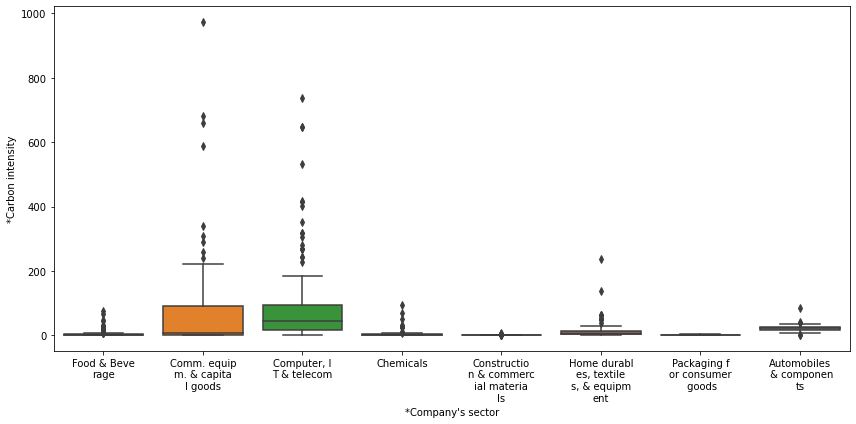

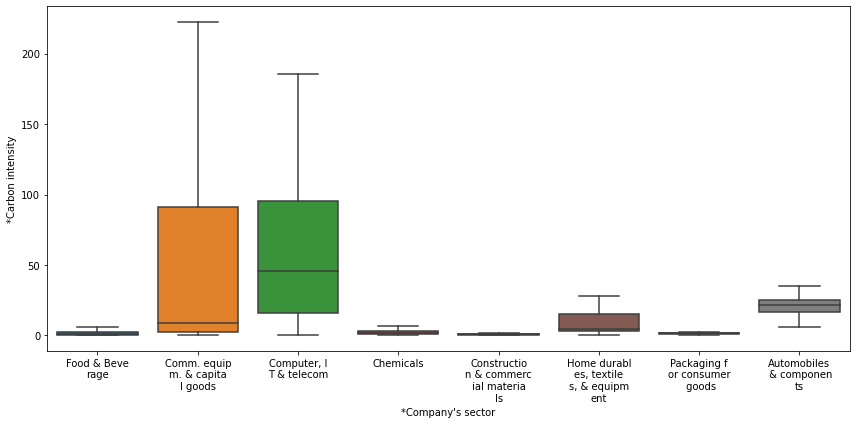

In [28]:
# plot distribution
plt.figure(figsize=(12,6))
fig=sns.boxplot(x='*Company\'s sector', y="*Carbon intensity", data=df)
plt.tight_layout()
plt.ylabel="carbon intensity"
plt.label=('*Company\'s sector')


# Function to wrap long labels
def wrap_labels(labels, max_len=11):
    return [label if len(label) <= max_len else '\n'.join([label[i:i+max_len] for i in range(0, len(label), max_len)]) for label in labels]

# Wrap the x-axis labels
labels = plt.gca().get_xticklabels()
new_labels = wrap_labels([label.get_text() for label in labels])

# Set the new wrapped labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tight_layout()
plt.show()

#----------------------------------------------------------
plt.figure(figsize=(12,6))
fig=sns.boxplot(x='*Company\'s sector', y="*Carbon intensity", data=df, showfliers=False)
plt.tight_layout()
plt.ylabel="carbon intensity"
plt.label=('*Company\'s sector')


# Function to wrap long labels
def wrap_labels(labels, max_len=11):
    return [label if len(label) <= max_len else '\n'.join([label[i:i+max_len] for i in range(0, len(label), max_len)]) for label in labels]

# Wrap the x-axis labels
labels = plt.gca().get_xticklabels()
new_labels = wrap_labels([label.get_text() for label in labels])

# Set the new wrapped labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tight_layout()
plt.show()


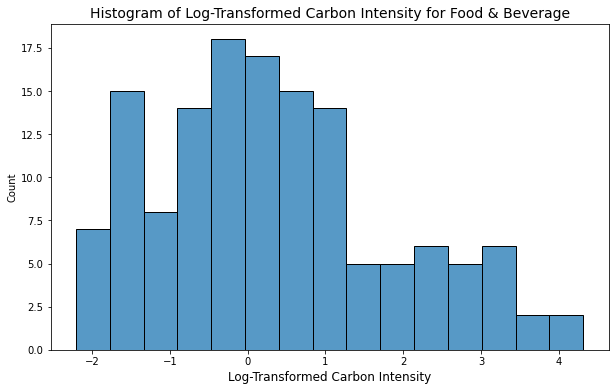

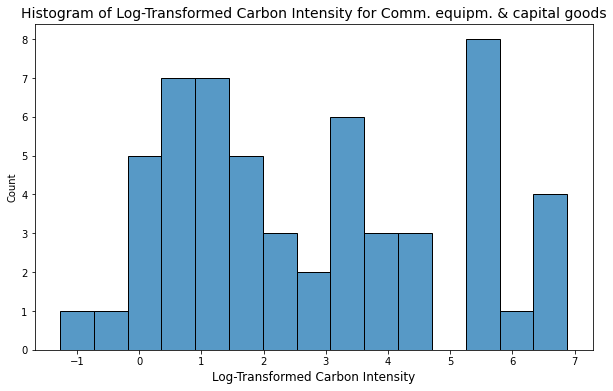

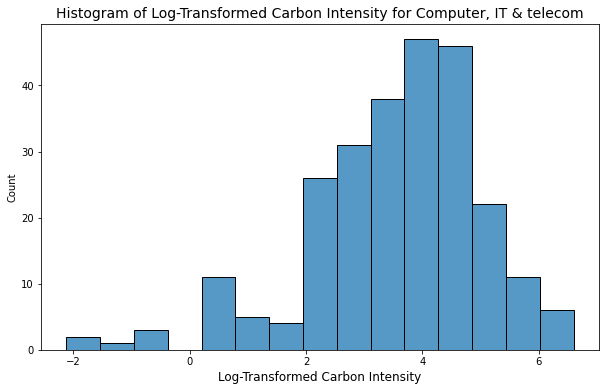

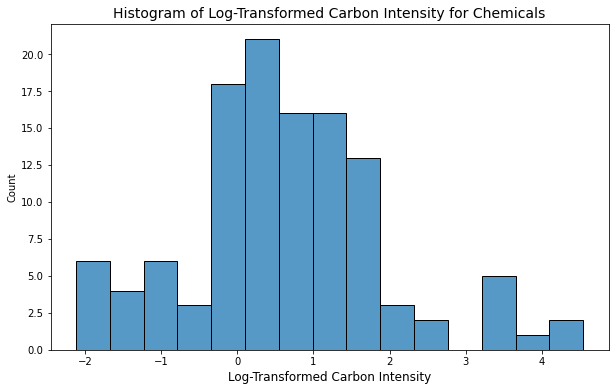

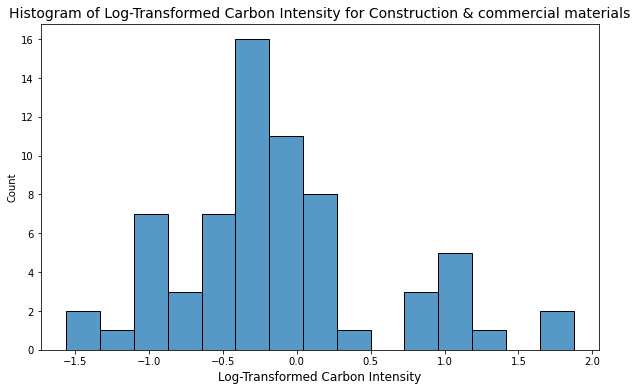

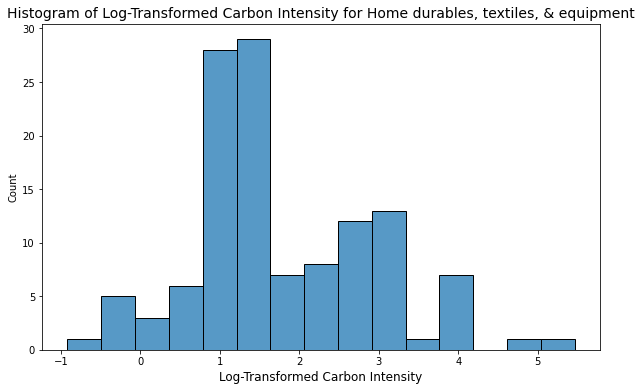

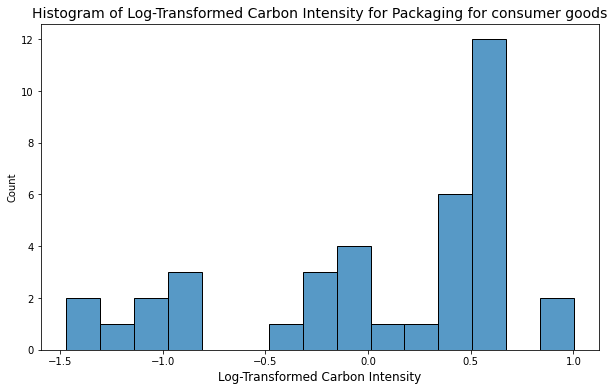

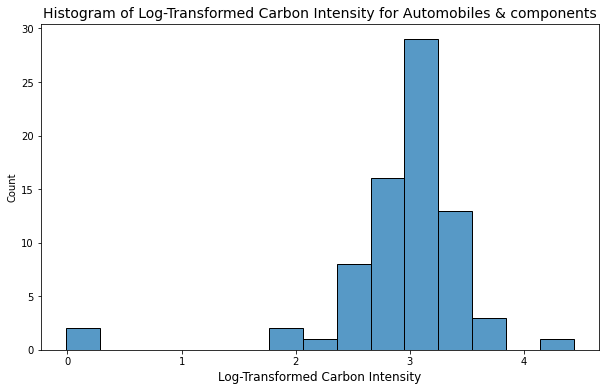

In [33]:
# Log-transform the Carbon intensity variable and store it in a new column
df['log_Carbon_intensity'] = np.log(df["*Carbon intensity"])

# Iterate over each sector and create histograms for the log-transformed values
for sector in df['*Company\'s sector'].unique():
    # Filter the data for each sector
    sector_data = df[df['*Company\'s sector'] == sector]
    
    # Plot the histogram for this sector (log-transformed values)
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.histplot(data=sector_data, x="log_Carbon_intensity", bins=15)
    plt.title(f'Histogram of Log-Transformed Carbon Intensity for {sector}', fontsize=14)  # Add title
    plt.xlabel('Log-Transformed Carbon Intensity', fontsize=12)  # Label the x-axis
    #plt.ylabel('Count', fontsize=12)  # Label the y-axis
    plt.show()  # Display the plot


<AxesSubplot:xlabel='*Carbon intensity', ylabel='Count'>

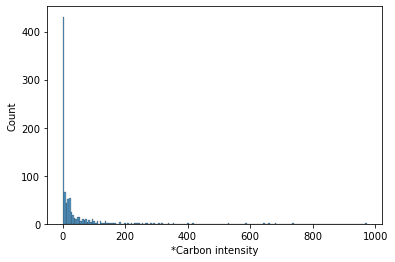

In [26]:
sns.histplot(x='*Carbon intensity', data=df)

<AxesSubplot:xlabel='log_Carbon_intensity', ylabel='Count'>

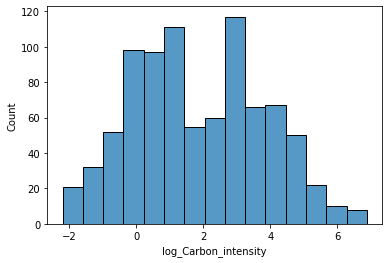

In [34]:
sns.histplot(x='log_Carbon_intensity', data=df)

In [35]:
df["*Company's sector"].value_counts()

Computer, IT & telecom                  253
Food & Beverage                         139
Home durables, textiles, & equipment    122
Chemicals                               116
Automobiles & components                 75
Construction & commercial materials      67
Comm. equipm. & capital goods            56
Packaging for consumer goods             38
Name: *Company's sector, dtype: int64

## Small dataset

In [36]:
# Calculate the counts for each sector
sector_counts = df["*Company's sector"].value_counts()

# Filter rows where the count of the sector is less than 100
df_selected = df[df["*Company's sector"].isin(sector_counts[sector_counts > 100].index)]

# Display the first few rows of the filtered DataFrame
df_selected.head()

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any),log_Carbon_intensity
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...,0.982078
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...,0.982078
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,None,2.604909
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,None,2.805177
5,10261-3-2017,2017,Yes,Multifunction Printers,bizhub C658,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,N/a,N/a (no previous data available),No,0.2005,0.0361,0.7634,0.0066,0.018,None,3.028683


In [37]:
df_selected["*Company's sector"].value_counts()

Computer, IT & telecom                  253
Food & Beverage                         139
Home durables, textiles, & equipment    122
Chemicals                               116
Name: *Company's sector, dtype: int64

In [38]:
# calculate standard deviation in carbon intensity across sectors
std_by_sector = df_selected.groupby('*Company\'s sector')['*Carbon intensity'].std()
print(std_by_sector)

*Company's sector
Chemicals                                12.471271
Computer, IT & telecom                  104.393587
Food & Beverage                          11.219660
Home durables, textiles, & equipment     27.055704
Name: *Carbon intensity, dtype: float64


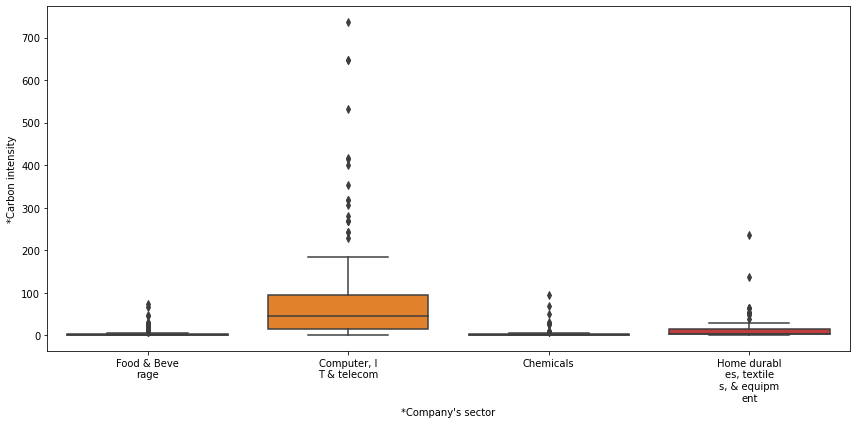

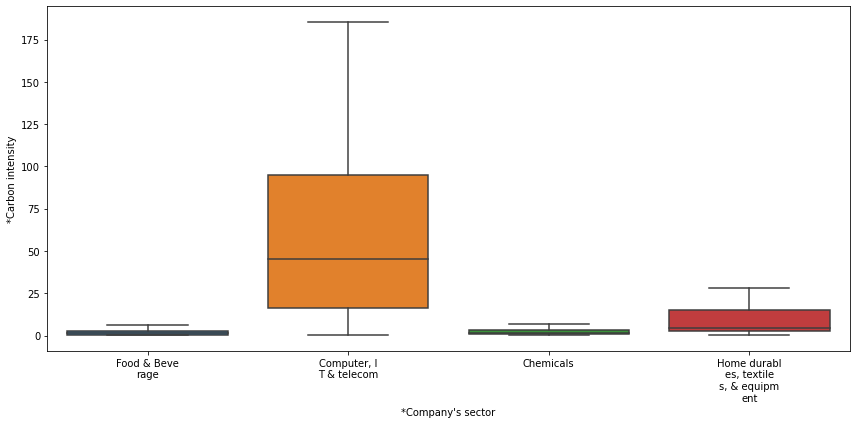

In [39]:
# plot distribution
plt.figure(figsize=(12,6))
fig=sns.boxplot(x='*Company\'s sector', y="*Carbon intensity", data=df_selected)
plt.tight_layout()
plt.ylabel="carbon intensity"
plt.label=('*Company\'s sector')


# Function to wrap long labels
def wrap_labels(labels, max_len=11):
    return [label if len(label) <= max_len else '\n'.join([label[i:i+max_len] for i in range(0, len(label), max_len)]) for label in labels]

# Wrap the x-axis labels
labels = plt.gca().get_xticklabels()
new_labels = wrap_labels([label.get_text() for label in labels])

# Set the new wrapped labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tight_layout()
plt.show()

#----------------------------------------------------------
plt.figure(figsize=(12,6))
fig=sns.boxplot(x='*Company\'s sector', y="*Carbon intensity", data=df_selected, showfliers=False)
plt.tight_layout()
plt.ylabel="carbon intensity"
plt.label=('*Company\'s sector')


# Function to wrap long labels
def wrap_labels(labels, max_len=11):
    return [label if len(label) <= max_len else '\n'.join([label[i:i+max_len] for i in range(0, len(label), max_len)]) for label in labels]

# Wrap the x-axis labels
labels = plt.gca().get_xticklabels()
new_labels = wrap_labels([label.get_text() for label in labels])

# Set the new wrapped labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tight_layout()
plt.show()


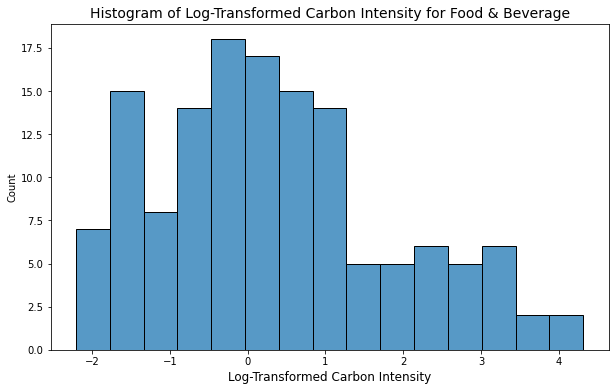

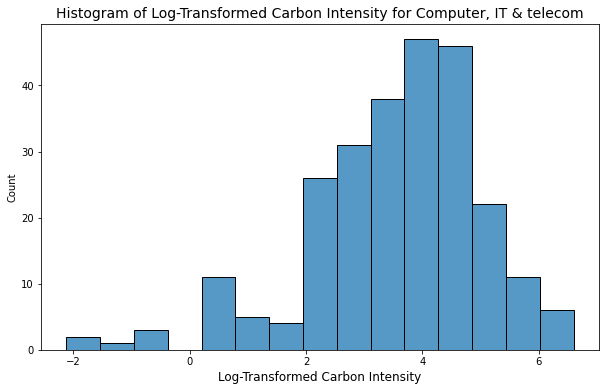

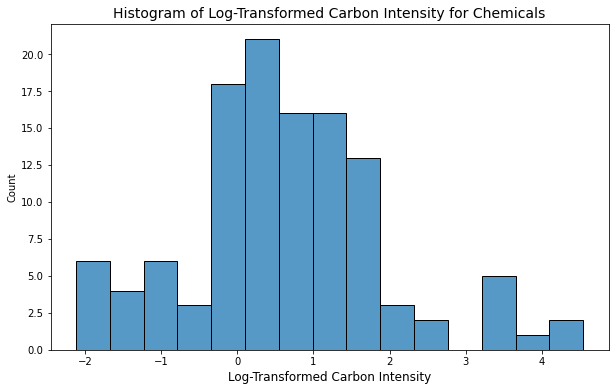

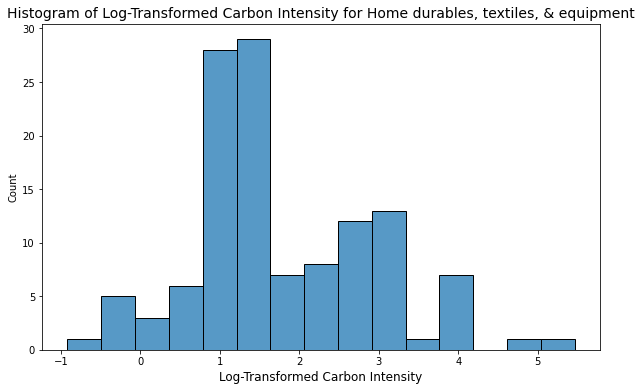

In [40]:
# Iterate over each sector and create histograms for the log-transformed values
for sector in df_selected['*Company\'s sector'].unique():
    # Filter the data for each sector
    sector_data = df_selected[df_selected['*Company\'s sector'] == sector]
    
    # Plot the histogram for this sector (log-transformed values)
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.histplot(data=sector_data, x="log_Carbon_intensity", bins=15)
    plt.title(f'Histogram of Log-Transformed Carbon Intensity for {sector}', fontsize=14)  # Add title
    plt.xlabel('Log-Transformed Carbon Intensity', fontsize=12)  # Label the x-axis
    #plt.ylabel('Count', fontsize=12)  # Label the y-axis
    plt.show()  # Display the plot


<AxesSubplot:xlabel='*Carbon intensity', ylabel='Count'>

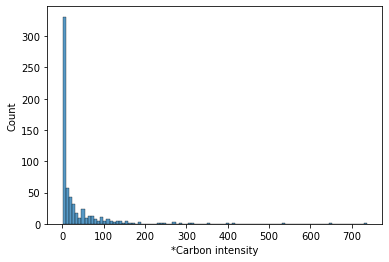

In [41]:
sns.histplot(x='*Carbon intensity', data=df_selected)

<AxesSubplot:xlabel='log_Carbon_intensity', ylabel='Count'>

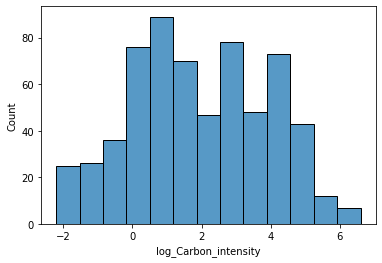

In [42]:
sns.histplot(x='log_Carbon_intensity', data=df_selected)

## ANOVA

In [ ]:
df_selected.rename(columns={"*Company's sector":"company_sector"}, inplace=True)

In [44]:
formula = "log_Carbon_intensity ~ C(company_sector)"
model = ols(formula, data=df_selected).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(company_sector),1200.266591,3.0,205.317427,1.052202e-92
Residual,1219.845936,626.0,NaN,NaN


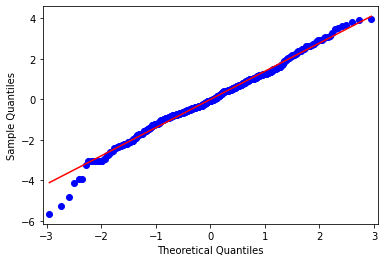

<AxesSubplot:ylabel='Count'>

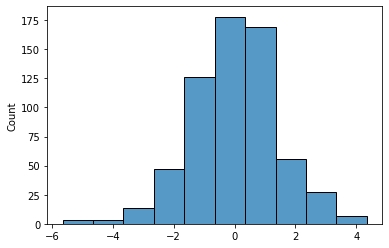

In [46]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()
sns.histplot(res, binwidth=1)

In [47]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_selected['log_Carbon_intensity'],      # Dependent variable
                          groups=df_selected['company_sector'],  # Grouping variable
                          alpha=0.05)                 # Significance level

# Display the results
print(tukey)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
        group1                        group2                meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------
             Chemicals               Computer, IT & telecom   2.9108  0.001  2.5076   3.314   True
             Chemicals                      Food & Beverage  -0.2784 0.3886 -0.7306  0.1738  False
             Chemicals Home durables, textiles, & equipment   1.1654  0.001  0.6991  1.6318   True
Computer, IT & telecom                      Food & Beverage  -3.1891  0.001 -3.5688 -2.8095   True
Computer, IT & telecom Home durables, textiles, & equipment  -1.7453  0.001 -2.1417  -1.349   True
       Food & Beverage Home durables, textiles, & equipment   1.4438  0.001  0.9977  1.8899   True
--------------------------------------------------------------------------------------------------


# **Task 3 - Carbon intensity among different value chain portions across sectors**

In [48]:
sheet1_df = pd.read_excel(path, 'Product Level Data')  # Replace 'Sheet1' with the actual sheet name if needed
sheet2_df = pd.read_excel(path, 'Stage Level Data')  # Replace 'Sheet2' with the actual sheet name if needed


In [49]:
print(sheet1_df)

          *PCF-ID  Year of reporting *Stage-level CO2e available  \
0    10056-1-2014               2014                         Yes   
1    10056-1-2015               2015                         Yes   
2    10222-1-2013               2013                         Yes   
3    10261-1-2017               2017                         Yes   
4    10261-2-2017               2017                         Yes   
..            ...                ...                         ...   
861   9298-2-2014               2014                         Yes   
862   9298-3-2013               2013                         Yes   
863   9298-3-2014               2014                         Yes   
864   9792-1-2017               2017                          No   
865   9792-2-2017               2017                          No   

                    Product name (and functional unit)  \
0                             Frosted Flakes(R) Cereal   
1    Frosted Flakes, 23 oz, produced in Lancaster, ...   
2        

In [50]:
# Rename columns by replacing spaces and dashes with underscores
sheet1_df.columns = sheet1_df.columns.str.replace(' ', '').str.replace('-', '').str.replace("'", "").str.replace('%','').str.replace('*','').str.lower()
sheet2_df.columns = sheet2_df.columns.str.replace(' ', '').str.replace('-', '').str.replace("'", "").str.replace('%','').str.replace('*','').str.lower()
sheet1_df.columns# To check the column names specifically
print(sheet1_df.columns)






Index(['pcfid', 'yearofreporting', 'stagelevelco2eavailable',
       'productname(andfunctionalunit)', 'productdetail', 'company',
       'country(wherecompanyisincorporated)', 'companysgicsindustrygroup',
       'companysgicsindustry', 'companyssector', 'productweight(kg)',
       'sourceforproductweight', 'productscarbonfootprint(pcf,kgco2e)',
       'carbonintensity', 'protocolusedforpcf',
       'relativechangeinpcfvsprevious', 'companyreportedreasonforchange',
       'changereasoncategory', 'upstreamestimatedfromoperations',
       'upstreamco2e(fractionoftotalpcf)',
       'operationsco2e(fractionoftotalpcf)',
       'downstreamco2e(fractionoftotalpcf)',
       'transportco2e(fractionoftotalpcf)',
       'endoflifeco2e(fractionoftotalpcf)', 'adjustmentstorawdata(ifany)'],
      dtype='object')


In [51]:
# Merge the two dataframes on the 'PCF-ID' column
merged_df = pd.merge(sheet1_df, sheet2_df, on='pcfid', how='inner')  # Use 'inner' for common rows, change 'how' if needed
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 0 to 1763
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pcfid                                        1764 non-null   object 
 1   yearofreporting                              1764 non-null   int64  
 2   stagelevelco2eavailable                      1764 non-null   object 
 3   productname(andfunctionalunit)               1764 non-null   object 
 4   productdetail                                1764 non-null   object 
 5   company                                      1764 non-null   object 
 6   country(wherecompanyisincorporated)          1764 non-null   object 
 7   companysgicsindustrygroup                    1764 non-null   object 
 8   companysgicsindustry                         1764 non-null   object 
 9   companyssector                               1764 non-null   object 
 10  

In [52]:
merged_df = merged_df.rename(columns={
    'upstreamco2e(fractionoftotalpcf)': 'upstreamcarbonintensity',
    'operationsco2e(fractionoftotalpcf)': 'operationscarbonintensity',
    'downstreamco2e(fractionoftotalpcf)': 'downstreamcarbonintensity',
    
})

# Check the result
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 0 to 1763
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pcfid                                        1764 non-null   object 
 1   yearofreporting                              1764 non-null   int64  
 2   stagelevelco2eavailable                      1764 non-null   object 
 3   productname(andfunctionalunit)               1764 non-null   object 
 4   productdetail                                1764 non-null   object 
 5   company                                      1764 non-null   object 
 6   country(wherecompanyisincorporated)          1764 non-null   object 
 7   companysgicsindustrygroup                    1764 non-null   object 
 8   companysgicsindustry                         1764 non-null   object 
 9   companyssector                               1764 non-null   object 
 10  

In [53]:
epsilon = 1e-6  # Small constant to avoid log(0) errors


In [56]:
merged_df['upstreamcarbonintensity'] = merged_df['upstreamcarbonintensity'].fillna(0)
merged_df['upstreamcarbonintensity_log'] = np.log(merged_df['upstreamcarbonintensity'] +epsilon)
merged_df['operationscarbonintensity'] = merged_df['operationscarbonintensity'].fillna(0)
merged_df['operationscarbonintensity_log'] = np.log(merged_df['operationscarbonintensity']+epsilon)
merged_df['downstreamcarbonintensity'] = merged_df['downstreamcarbonintensity'].fillna(0)
merged_df['downstreamcarbonintensity_log'] = np.log(merged_df['downstreamcarbonintensity']+epsilon)


In [57]:
print(merged_df[['companyssector', 'upstreamcarbonintensity', 'upstreamcarbonintensity_log', 
                 'operationscarbonintensity', 'operationscarbonintensity_log', 
                 'downstreamcarbonintensity', 'downstreamcarbonintensity_log']])

              companyssector  upstreamcarbonintensity  \
0            Food & Beverage                   0.5750   
1            Food & Beverage                   0.5750   
2            Food & Beverage                   0.5750   
3            Food & Beverage                   0.5750   
4            Food & Beverage                   0.5750   
...                      ...                      ...   
1759  Computer, IT & telecom                   0.2857   
1760  Computer, IT & telecom                   0.2857   
1761  Computer, IT & telecom                   0.3143   
1762  Computer, IT & telecom                   0.3143   
1763  Computer, IT & telecom                   0.3143   

      upstreamcarbonintensity_log  operationscarbonintensity  \
0                       -0.553383                     0.3000   
1                       -0.553383                     0.3000   
2                       -0.553383                     0.3000   
3                       -0.553383                     0.300

In [58]:
# Get unique labels in the 'sector' column
unique_sectors = merged_df['companyssector'].unique()
print("Unique labels in 'companyssector':", unique_sectors)


Unique labels in 'companyssector': ['Food & Beverage' 'Comm. equipm. & capital goods'
 'Computer, IT & telecom' 'Home durables, textiles, & equipment'
 'Chemicals' 'Construction & commercial materials'
 'Packaging for consumer goods' 'Automobiles & components']


In [59]:
# Reshape the Data from wide to long format
merged_df_long = pd.melt(merged_df, id_vars=['companyssector'], 
                  value_vars=['upstreamcarbonintensity_log', 'operationscarbonintensity_log', 'downstreamcarbonintensity_log'],
                  var_name='valuechain', value_name='carbon_intensity')
print(merged_df_long)

              companyssector                     valuechain  carbon_intensity
0            Food & Beverage    upstreamcarbonintensity_log         -0.553383
1            Food & Beverage    upstreamcarbonintensity_log         -0.553383
2            Food & Beverage    upstreamcarbonintensity_log         -0.553383
3            Food & Beverage    upstreamcarbonintensity_log         -0.553383
4            Food & Beverage    upstreamcarbonintensity_log         -0.553383
...                      ...                            ...               ...
5287  Computer, IT & telecom  downstreamcarbonintensity_log        -13.815511
5288  Computer, IT & telecom  downstreamcarbonintensity_log        -13.815511
5289  Computer, IT & telecom  downstreamcarbonintensity_log         -1.945603
5290  Computer, IT & telecom  downstreamcarbonintensity_log         -1.945603
5291  Computer, IT & telecom  downstreamcarbonintensity_log         -1.945603

[5292 rows x 3 columns]


In [65]:
model2 = ols('carbon_intensity ~ C(companyssector) + C(valuechain) + C(companyssector):C(valuechain)', data=merged_df_long).fit()
# Perform the ANOVA
anova_results2 = anova_lm(model2)
# Display the ANOVA results
print(anova_results2)
aov_table = anova_lm(model2, typ=2)

                                     df        sum_sq      mean_sq  \
C(companyssector)                   7.0   3430.709694   490.101385   
C(valuechain)                       2.0   2575.461119  1287.730559   
C(companyssector):C(valuechain)    14.0  14703.582727  1050.255909   
Residual                         5268.0  24506.272137     4.651912   

                                          F         PR(>F)  
C(companyssector)                105.354828  7.518964e-145  
C(valuechain)                    276.817484  4.858432e-115  
C(companyssector):C(valuechain)  225.768656   0.000000e+00  
Residual                                NaN            NaN  


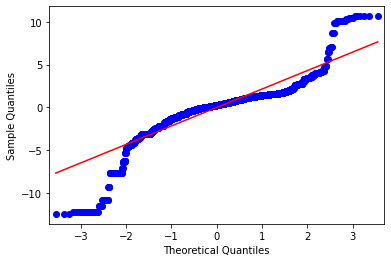

<AxesSubplot:ylabel='Count'>

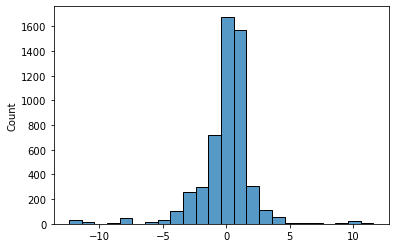

In [69]:
# Q-Q plot for residuals

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()
sns.histplot(res, binwidth=1)

In [73]:
# Perform Tukey's HSD for 'sector' main effect
tukey_sector = pairwise_tukeyhsd(merged_df_long['carbon_intensity'], merged_df_long['companyssector'], alpha=0.05)
print("\nTukey HSD Test for 'companyssector':")
print(tukey_sector)



Tukey HSD Test for 'companyssector':
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
            Automobiles & components                            Chemicals  -2.2827  0.001 -3.1344 -1.4309   True
            Automobiles & components        Comm. equipm. & capital goods  -0.5622 0.4553 -1.3966  0.2723  False
            Automobiles & components               Computer, IT & telecom   0.0069    0.9 -0.7409  0.7548  False
            Automobiles & components  Construction & commercial materials  -0.5483 0.4825 -1.3793  0.2827  False
            Automobiles & components                      Food & Beverage   0.5345 0.4177 -0.2374  1.3065  False
            Automobiles & components Home durables, textil

In [75]:
# Tukey HSD for 'valuechain'
tukey_valuechain = pairwise_tukeyhsd(merged_df_long['carbon_intensity'], merged_df_long['valuechain'], alpha=0.05)
print("\nTukey HSD Test for 'valuechain':")
print(tukey_valuechain)



Tukey HSD Test for 'valuechain':
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
            group1                        group2            meandiff p-adj lower  upper  reject
-----------------------------------------------------------------------------------------------
downstreamcarbonintensity_log operationscarbonintensity_log   0.4531 0.001  0.229 0.6772   True
downstreamcarbonintensity_log   upstreamcarbonintensity_log   1.6534 0.001 1.4293 1.8776   True
operationscarbonintensity_log   upstreamcarbonintensity_log   1.2004 0.001 0.9762 1.4245   True
-----------------------------------------------------------------------------------------------


In [77]:
# Tukey HSD for the interaction term 'companysector x valuechain'
merged_df_long['interaction'] = merged_df_long['companyssector'] + ' - ' + merged_df_long['valuechain']
tukey_interaction = pairwise_tukeyhsd(merged_df_long['carbon_intensity'], merged_df_long['interaction'], alpha=0.05)
print("\nTukey HSD Test for Interaction (companyssector x valuechain):")
print(tukey_interaction)


Tukey HSD Test for Interaction (companyssector x valuechain):
                                                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                
                               group1                                                               group2                                meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            Automobiles & components - downstreamcarbonintensity_log             Automobiles & components - operationscarbonintensity_log   -3.622  0.001  -5.2588  -1.9853   True
            Automobiles & components - downstreamcarbonintensity_log               Automobiles & components - upstreamcarbonintensity_log  -2.2186  0.001  -3.8553  -0.5819   True
            Automobiles & components - dow